<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Gabriela Mora
- Nombre de alumno 2: Raúl Silva


### **Link de repositorio de GitHub:** `https://github.com/RaulSilvaA/MDS7202-mora-silva`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 56.2 MB/s eta 0:00:00
  Attempting uninstall:

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/My Drive/LabsMDS/Lab6/'
except: 
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [ ]:
df_retail = pd.read_pickle(path+"online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


Los atributos que contiene el dataset son Invoice, StockCode Description, Quantity, InvoiceDate, Price, CustomerID y Country. Los tipos de datos de las columnas son los siguientes:



*   Category:Invoice, StockCode y Customer ID
*   Object: Descriptión y Country
*   Int: Quantity 
*   Float: Price
*   Datetime: InvoiceDate  

En cuanto a lo que corresponde cada columna:



*   Invoice: número de la boleta
*   StockCode: código del producto
*   Description: descripción del producto que se compró
*   Quantity: cantodad del producto que se compró
*   InvoiceDate: fecha de la boleta
*   Price: precio del producto que se compró
*   CustomerID: identificador de cliente
*   Country: país en donde se realizó la compra




## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**



*   Análisis univariable: se refiere al análisis individual de cada atributo del dataset con el objetivo de ver su distribución, tendencias y valores atípicos
*   Análisis multivariable: se refiere al análisis entre atributos del dataset, donde se utilizan gráficos de dispersión y técnicas estadísticas para ver si hay correlaciones entre ellas
* Datos faltantes: son datos que faltan en uno o más atributos del dataset

Los beneficios que otorga estudiar los datos faltantes es saber cómo manejarlos, ya que dependiendo su tipo (mcar, mar o mnar) su forma de tratarlos es distinto para no inducir en sesgos la bbdd.



### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [ ]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [ ]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

 Se puede observar que la mayoría de los datos se encuentran concentrados en un rango de precio de 0 a 20, tieniendo un pico de frecuencia mucho más cerca del valor 0 y se asemejaa una curva lognormal.
    
  Por otro lado, se puede observar que en la columna price hay valores negativos y nulos. Esto claramente son productos mal etiquetados que no tienen que ser considerados en el análisis. 

  Por último, se puede observar que hay precios que se escapan de las medidas de tendencia central de esta variable, como por ejemplo un valor de producto igual a 1269. Antes de considerar este dato como un outlier, se recomienda revisar la descripción del producto para ver si tiene sentido de que algo tenga ese precio.

In [ ]:
profile_serie(df_retail['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

  Se puede observar que la mayoría de los datos se encuentran concentrados en un rango de cantidad de 0 a 100, tieniendo un pico de frecuencia mucho más cerca del valor 0 y se asemeja a una curva lognormal.
  
  Por otro lado, se puede observar que en la columna hay valores negativos. Esto claramente son productos en donde se ingresó mal la cantidad de producto coprado, por lo que no se deberían incluir esos registros en el análisis. 

  Por último, se puede observar que hay precios que se escapan de las medidas de tendencia central de esta variable, como por ejemplo un valor de producto igual a 567. Esos valores se consideran mal ingresados, ya que no tiene sentido que se compre una cantidad de esa magnitud, por lo que filtrar esta variable por los outlier tiene sentido y se dejen solo valores iguales o menores a 101.




In [ ]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

  Esta variable no tiene nulos ni ceros como es de esperar, ya que 
  corresponde al número de boleta de la compra. Eso sí, lo interesante 
  de analizar esta variable sería ver qué tan probable es que en el tipo 
  de tienda consultada sea normal que se compre una cantidad de
  productos de la magnitud de 600. Por lo que se observa, es un comportamiento 
  habitual entre otras boletas con menores cantidades de producto, por lo que en esta 
  columna no se filtrarán por valores. Se tiene como hipótesis que
  en estas tiendas existen compradores mayoristas

In [ ]:
profile_serie(df_retail['Country']) 

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

In [ ]:
df_retail.loc[(df_retail['Country'] =='Unspecified')&(df_retail['Price'] >100)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
270810,C515620,M,Manual,-1,2010-07-14 09:35:00,1189.94,16320.0,Unspecified


  En este atributo se puede observar que el valor nulo es representado
  por unspecified. Al hacer un doble click en la cantidad que registros que contiene ese valor, observamos que representa menos de un 1% de la
  cantidad total de los registros y como no entrega mayor información
  se elimininarán esos. Sin embargo, recomendamos a la tienda revisar el registro correspondiente al día 2010-07-14 a las 09:35:00, pues se realiza una trasacción muy sospechoza a un país Sin especificar con una cantidad negativa, demasiado sospechozo. 



In [ ]:
profile_serie(df_retail['StockCode']) 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

  En este atributo se puede observar un distribución lognormal en las
  categorías que tienen más compras. Además se observa que no hay
  valores nulos, pero sí categorías que son levemente diferentes al
  resto como: M, POST y DOT. Debido a que son categorías que tienen
  frecuencias bastantes altas, se decide mantenerlas porque puede que
  sea una categoría real debido a que no contamos con más información.



In [ ]:
profile_serie(df_retail['Description']) 

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

  Esta variable no presenta valores nulos, además de presentar una
  distribución log normal en la compra de los productos. Esta columna no
  se filtrará de ninguna forma debido a que no se observan valores
  extraños en las descripciones.

In [ ]:
profile_serie(df_retail['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

  No se observa una distribución clara en los datos de la fecha de
  compra. Eso sí se puede apreciar que en noviembre las compras
  aumentaron en ese plazo de tiempo. Los valores mínimos y máximos de
  esta variable también están en un rango lógico, por que no se observan
  valores inconsistentes en esta variable (y tampoco se presentan
  valores nulos).

In [ ]:
profile_serie(df_retail['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

  En esta variable se puede observar una distribuciín lognormal entre
  los consumidores que más compran. También se puede observar que hay
  valores nulos en el id del cliente, pero esto no debería ser algo
  entorpezca el análisis a menos que se calculen medidas en torno al
  cliente. Si este no es el caso, lo recomendado es dejar estas columna
  como está o cambiar el valor nulo como "cliente no declarado". Una
  hipótesis sobre lo último que se menciona, es que los clientes que
  cuentan con id son empresas y no personas naturales, por lo que es
  lógico que las tiendas tengan trazabilidad de ellos porque hacen
  compras grandes a lo largo del tiempo, a diferencia de personas
  naturales que podrían tener un comportamiento más esporádico en cuanto a compras.



### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [ ]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

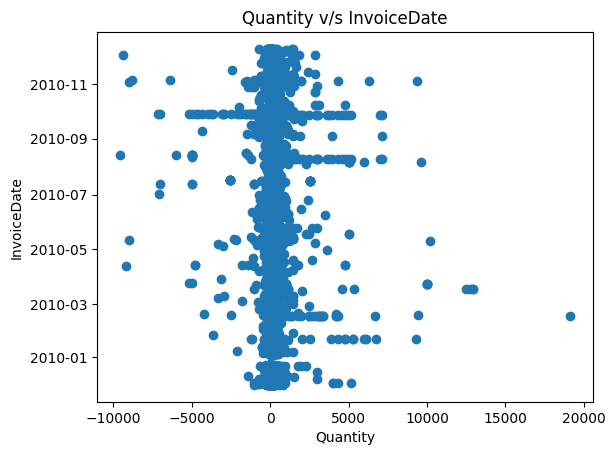

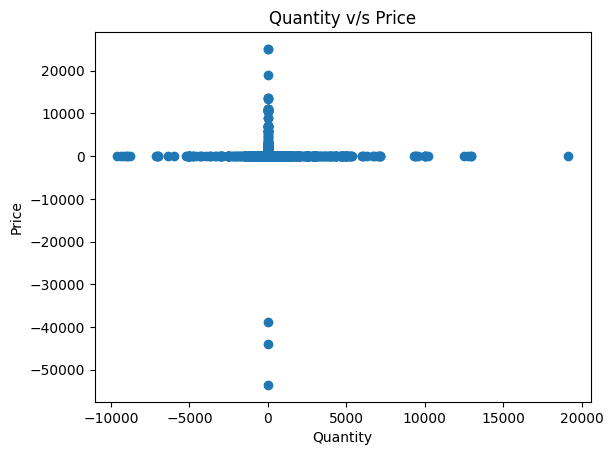

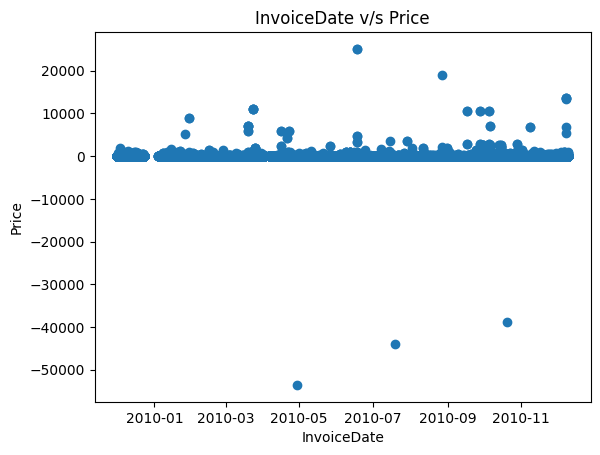

## Correlation:

## Missing Matrix:

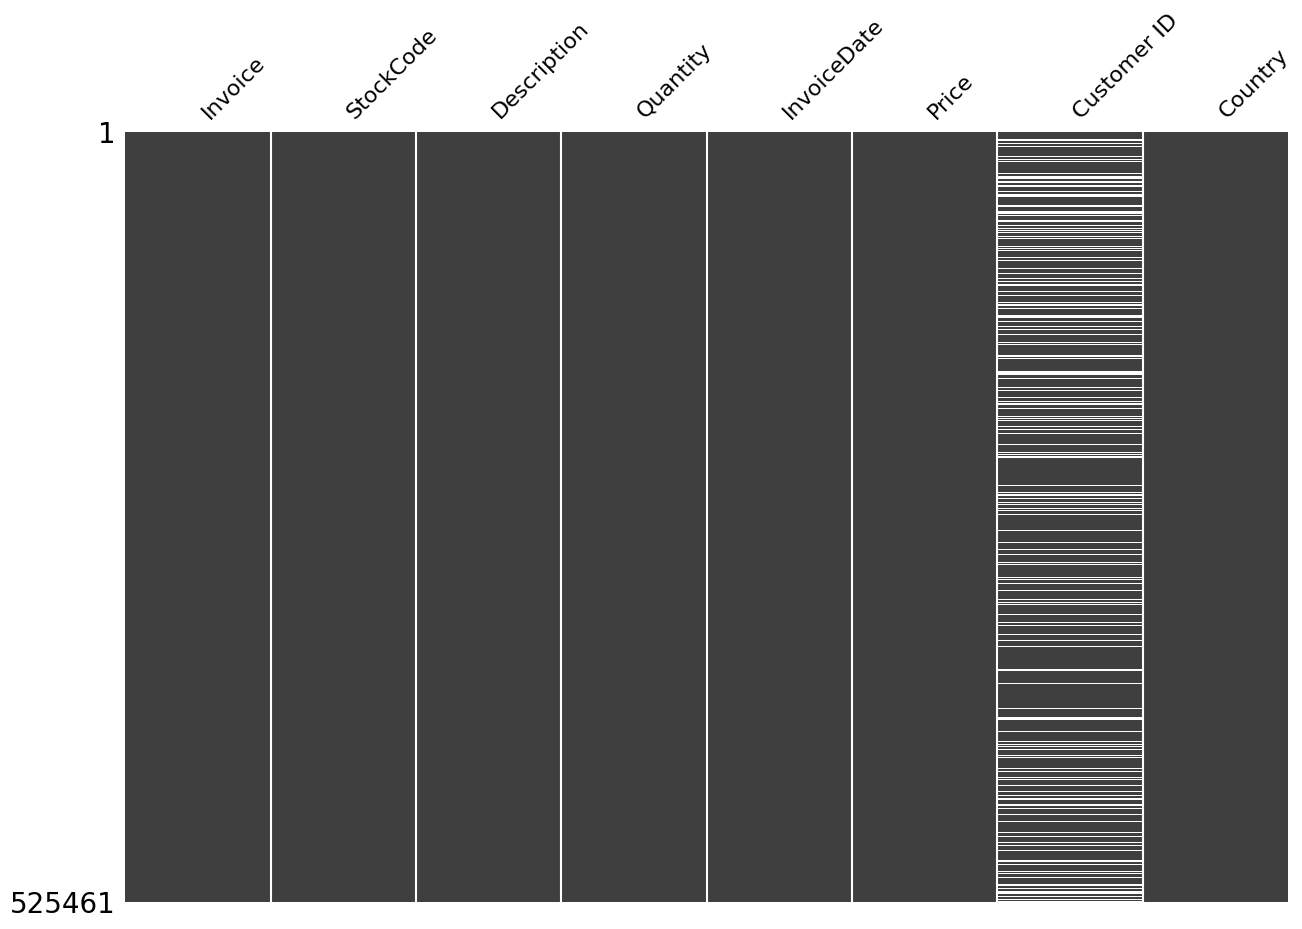

In [ ]:
profile_df(df_retail)

Como se puede observar en los gráficos de dispersión, se puede observar que ante la variación de una variable, la otra se mantiene prácticamente en un mismo valor, dando como resultado una línea horizontal/vertical. Donde se podría especular un poco más de variabilidad es en las variables cantidad y fecha de la boleta, pero aún así la correlaciónparecer ser bastante baja. Al observar la matriz de correlación de pearson, las variables numéricas del dataset no tiene relación entre sí. Pir último, se puede observar que la variable customerid cuenta con muchos datos nulos.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [ ]:
df_retail.loc[(df_retail['Price'] >5000)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
71077,495798,ADJUST,Adjustment by john on 26/01/2010 17,1,2010-01-26 17:25:00,5117.03,NaN,United Kingdom
74356,496115,M,Manual,1,2010-01-29 11:04:00,8985.60,17949.0,United Kingdom
74357,C496116,M,Manual,-1,2010-01-29 11:05:00,8985.60,17949.0,United Kingdom
129902,C501751,M,Manual,-1,2010-03-19 11:30:00,6958.17,15760.0,Norway
129903,501766,M,Manual,1,2010-03-19 11:35:00,6958.17,15760.0,Norway
129987,501768,M,Manual,1,2010-03-19 11:45:00,6958.17,15760.0,Norway
129988,C501769,M,Manual,-1,2010-03-19 11:49:00,6958.17,15760.0,Norway
130003,C501771,M,Manual,-1,2010-03-19 11:53:00,5795.87,15760.0,Norway
130004,501772,M,Manual,1,2010-03-19 11:56:00,5795.87,NaN,United Kingdom
135012,C502262,M,Manual,-1,2010-03-23 15:20:00,10953.50,12918.0,United Kingdom


In [ ]:
df_retail.loc[(df_retail['Quantity'] >10000)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.1,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.1,13902.0,Denmark
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.1,13902.0,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.1,13902.0,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.1,13902.0,Denmark
192197,507637,84016,FLAG OF ST GEORGE CAR FLAG,10200,2010-05-10 14:55:00,0.0,NaN,United Kingdom


Como al parecer los precios altos se tratan de impuestos y estos no ayudan a un análisis de ventas, estos serán removidos. 

Por otro lado, las cantidades altas de venta se realizaron al mismo pais, con productos de un bajo precio, por lo que ausmiendo de que se trata de una venta al por mayor, no habría nada raro en esto.

In [ ]:
def clean_data(df):
  clear_df=df[(df['Price'] > 0) & (df['Price'] < 5000) & (df['Quantity'] > 0) & (df['Country'] != 'Unspecified')& (df['StockCode'] != 'M')]
  return clear_df

In [ ]:
clear_retail = clean_data(df_retail)

In [ ]:
clear_retail.describe()

,Quantity,InvoiceDate,Price
count,510701.000000,510701,510701.000000
mean,11.407193,2010-06-28 22:03:43.632967168,3.697339
min,1.000000,2009-12-01 07:45:00,0.001000
25%,1.000000,2010-03-21 15:03:00,1.250000
50%,3.000000,2010-07-07 09:29:00,2.100000
75%,10.000000,2010-10-15 15:13:00,4.210000
max,19152.000000,2010-12-09 20:01:00,1157.150000
std,86.832909,NaN,10.560444


In [ ]:
profile_serie(clear_retail['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         510701.0
Mean                          11.407193
Std                           86.832909
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       11830.510054
Skew                          88.601769
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   510560
Duplicate rows (%)              99.97 %
Total size in memory      8171216 bytes
dtype: object

In [ ]:
profile_serie(clear_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         510701.0
Mean                           3.697339
Std                           10.560444
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                             1157.15
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        3007.898023
Skew                          45.084731
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   509963
Duplicate rows (%)              99.86 %
Total size in memory      8171216 bytes
dtype: object

In [ ]:
profile_serie(clear_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           510701
Unique                            20719
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   508798
Duplicate rows (%)              99.63 %
Total size in memory      6394346 bytes
dtype: object

In [ ]:
profile_serie(clear_retail['Country']) 

## Country Profile

Type                              object
Number of observations            510701
Unique                                39
Top                       United Kingdom
Freq                              472876
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    510701
Duplicate rows (%)               100.0 %
Total size in memory       8171216 bytes
dtype: object

In [ ]:
profile_serie(df_retail['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

## Bivariant Analysis:

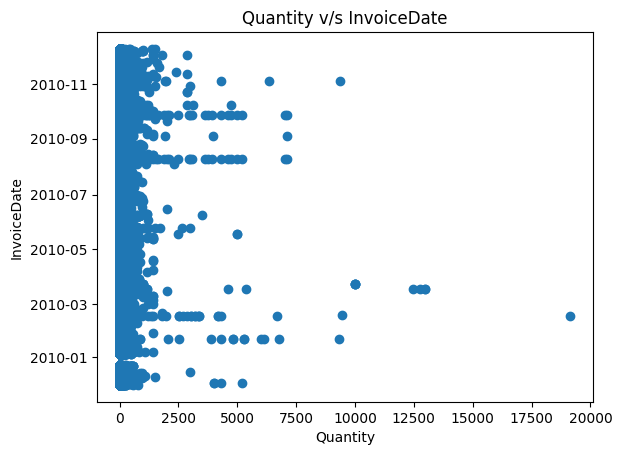

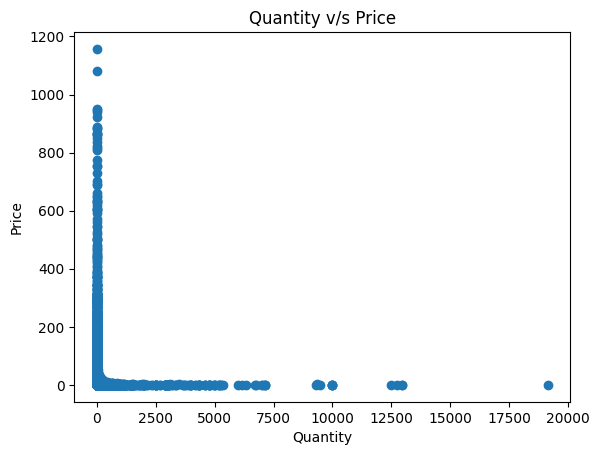

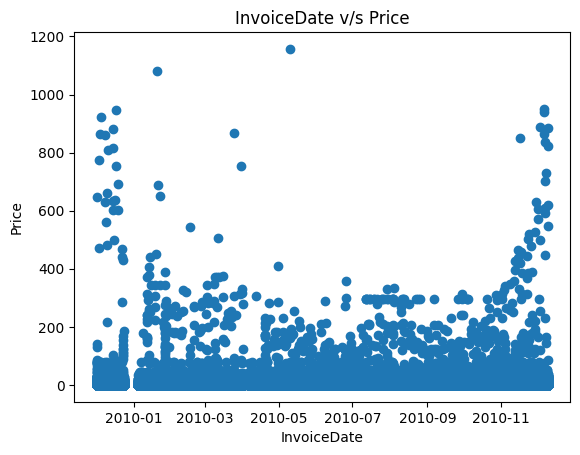

## Correlation:

## Missing Matrix:

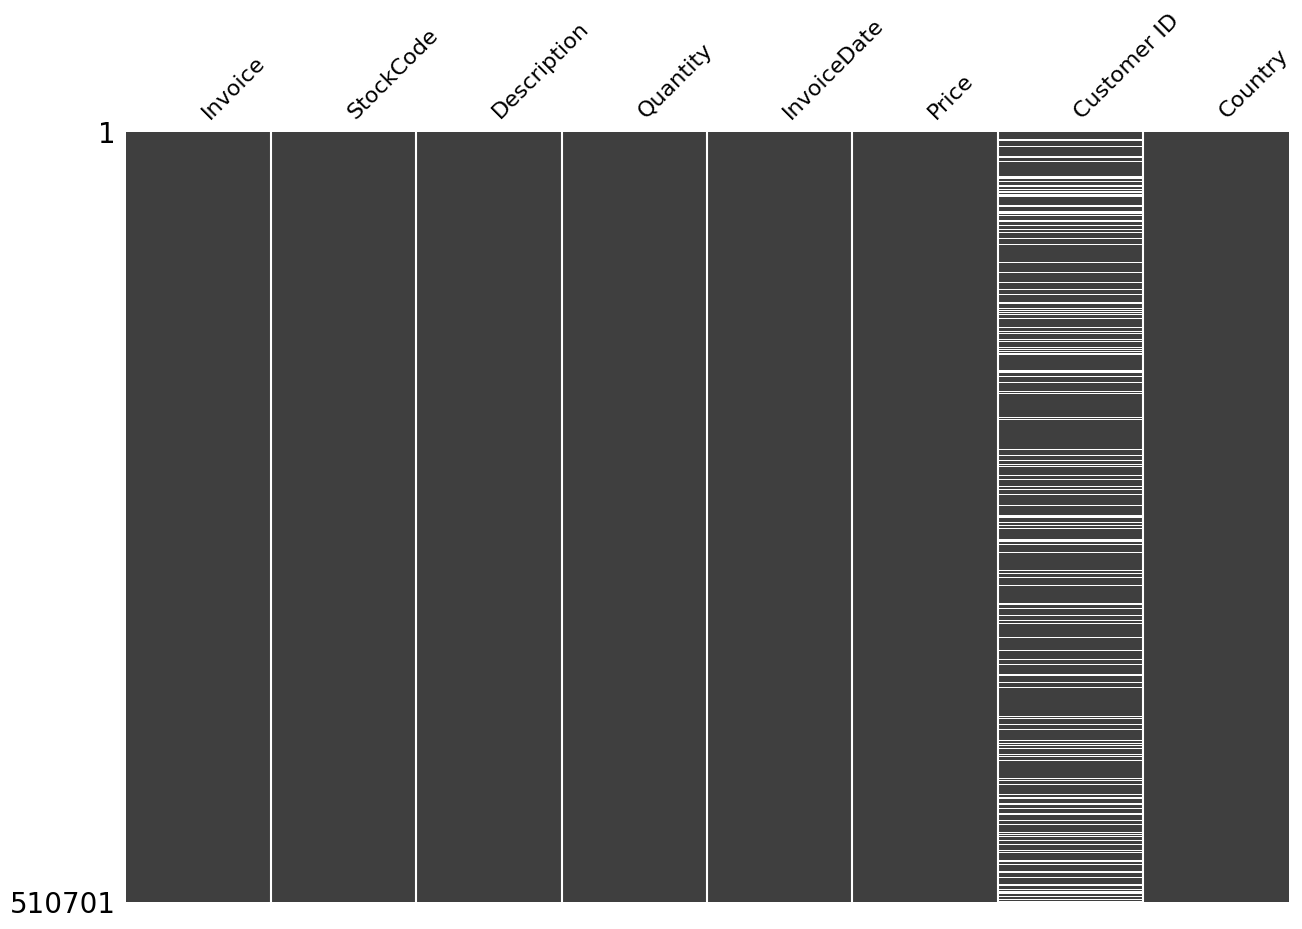

In [ ]:
profile_df(clear_retail)

Post limpieza, se puede apreciar que el análisis multivariado es mucho más entendible. Existen ventas que son sospechozas, pero se recomienda realizar un catastro para reconocer la existencia de estos precios tan altos, pues la mayoría de ellos provienen de ingresos manuales al sistema, dejando mucho espacio a la interpretación.

Por otro lado, las distribuciones no cambian del todo, suelen mantenerse las medias de tendencia central luego de la limpieza, con una desviación estándar menor. Salvo el gráfico de precios, el que varía bastante, sobre todo por la eliminaciónm de sus outliers tan grandes

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [ ]:
clear_retail['Ganancias'] = clear_retail['Price']*clear_retail['Quantity']
clear_retail.describe()

<ipython-input-28-0866592f30d1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Quantity,InvoiceDate,Price,Ganancias
count,510701.000000,510701,510701.000000,510701.000000
mean,11.407193,2010-06-28 22:03:43.632967168,3.697339,19.603907
min,1.000000,2009-12-01 07:45:00,0.001000,0.001000
25%,1.000000,2010-03-21 15:03:00,1.250000,4.200000
50%,3.000000,2010-07-07 09:29:00,2.100000,10.140000
75%,10.000000,2010-10-15 15:13:00,4.210000,17.700000
max,19152.000000,2010-12-09 20:01:00,1157.150000,15818.400000
std,86.832909,NaN,10.560444,65.947725


In [ ]:
group_retail = clear_retail.groupby(['Description'])[['Ganancias', 'Quantity']].sum()
tabla = group_retail.reset_index()
top_30 = tabla.nlargest(30, 'Ganancias')
top_30

,Description,Ganancias,Quantity
3328,REGENCY CAKESTAND 3 TIER,170027.51,13694
4348,WHITE HANGING HEART T-LIGHT HOLDER,160610.13,58785
1279,DOTCOM POSTAGE,116408.71,730
268,ASSORTED COLOUR BIRD ORNAMENT,73092.99,45348
2739,PAPER CHAIN KIT 50'S CHRISTMAS,58189.25,17226
2124,JUMBO BAG RED RETROSPOT,56595.51,30805
2753,PARTY BUNTING,49682.72,10083
3123,POSTAGE,49477.54,2310
3449,ROTATING SILVER ANGELS T-LIGHT HLDR,47985.09,23049
1335,EDWARDIAN PARASOL NATURAL,36925.26,7469


In [ ]:
fig = px.bar(top_30, x='Description', y=['Ganancias','Quantity'], barmode='group', title='Top 30 en ganancias')
fig.show()


Como apreciamos más arriba en el análisis, los artículios más vendidos fueron unos de papelería hacia Dinamarca. Estos al no ser del todo caros, no presentaron una alta ganancia. De hecho, estos ni siquiera logran aparecer en el top de ganancias, liderado por REGENCY CAKESTAND 3 TIER.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [ ]:
clear_retail['InvoiceDate'] = pd.to_datetime(clear_retail['InvoiceDate'])
clear_retail['Fecha'] = clear_retail['InvoiceDate'].dt.date
group_date = clear_retail.groupby(['Fecha'])[['Ganancias', 'Quantity']].sum()
tabla_date = group_date.reset_index()
tabla_date

<ipython-input-35-37a7f4ad750d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-37a7f4ad750d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Fecha,Ganancias,Quantity
0,2009-12-01,54509.50,26203
1,2009-12-02,63352.51,31896
2,2009-12-03,74037.91,49243
3,2009-12-04,40731.86,21323
4,2009-12-05,9803.05,5119
...,...,...,...
302,2010-12-05,31732.99,16394
303,2010-12-06,54775.03,21775
304,2010-12-07,85152.28,25218
305,2010-12-08,45350.02,23081


In [ ]:
fig = px.bar(tabla_date, x='Fecha', y='Ganancias', title='Ganancias respecto al tiempo')
fig.show()

In [ ]:
fig = px.bar(tabla_date, x='Fecha', y='Quantity', title='Ganancias respecto al tiempo')
fig.show()

En general no hay cosas muy raras, más allá de que hay un par de días especícifos en los que se hicieron ventas por cantidades enormes. Por otro lado, también se pude apreciar que hay épocas de hasta dos semanas en las que no se gan+o ni un céntimo.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>